## Implementing Regression

### 1. Regression Housing Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ggplot import *

%matplotlib inline

c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
df = pd.read_csv("data/house_price_area_only.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 3 columns):
Unnamed: 0    6028 non-null int64
price         6028 non-null int64
area          6028 non-null int64
dtypes: int64(3)
memory usage: 141.3 KB


In [4]:
df.iloc[1,1]

1744259

In [5]:
df.head()

,Unnamed: 0,price,area
0,0,598291,1188
1,1,1744259,3512
2,2,571669,1134
3,3,493675,1940
4,4,1101539,2208


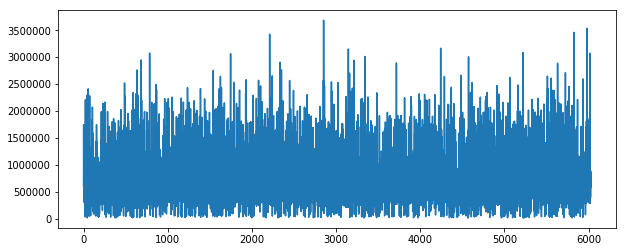

In [6]:
plt.rcParams['figure.figsize'] = [10,4]
plt.plot(df.price);

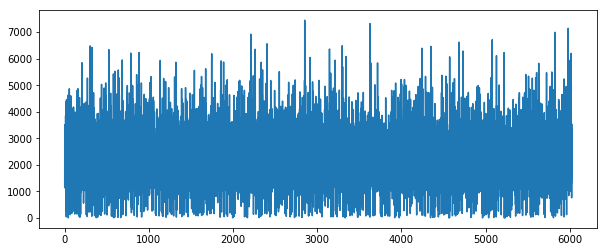

In [7]:
plt.plot(df.area);

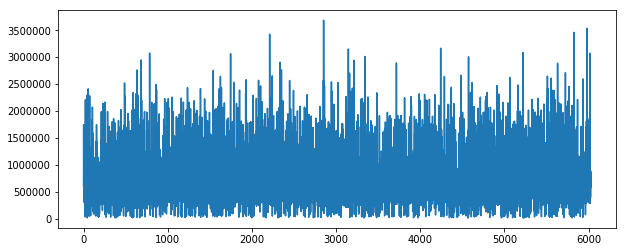

In [8]:
plt.plot(df.index, df['price'])

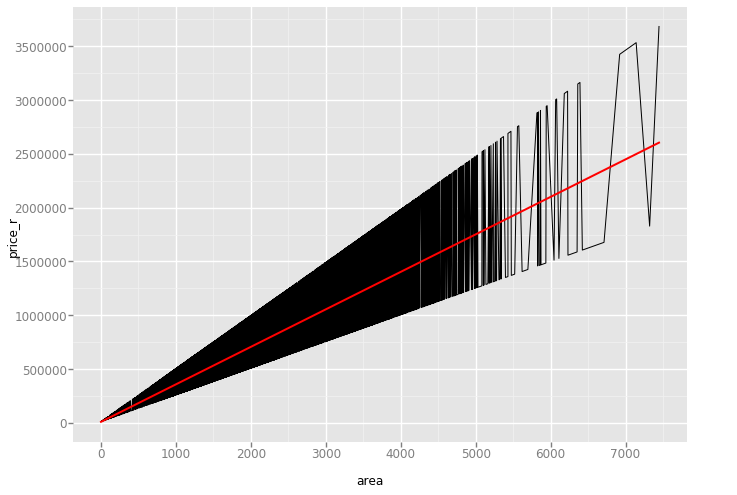

<ggplot: (13977295)>

In [9]:
x = df['area']
df['price_r'] = x*348.5 + 9587
ggplot(df, aes('area', 'price')) + geom_line() + geom_line(aes('area', 'price_r', color = 'r', size = 2))

In [10]:
spector_data = sm.datasets.spector.load()

spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
df['intercept'] = 10
# Fit and summarize OLS model
mod = sm.OLS(df.price, df[['area','intercept']])

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:36:47   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
area         348.4664      3.093    112.662      0.0

In [11]:
res.rsquared


0.6780760261385548

ValueError: Length mismatch: Expected axis has 5 elements, new values have 3 elements

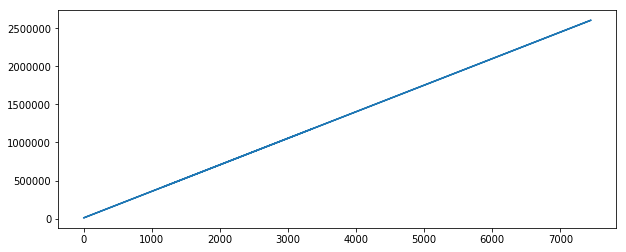

In [12]:
x = df['area']
plt.plot(x, x*348.5 + 9587)
df.columns = ['index','price','area']
df.head()

### 2. Regression Carats vs. Price
In this notebook, you will perform a similar analysis to the one you did in the previous notebook, but using a dataset holding the weight of a diamond in carats, and the price of the corresponding diamond in dollars.

To get started, let's read in the necessary libraries and the dataset.

In [67]:
df2 = pd.read_csv('data/carats.csv', header=None)
df2.columns = ['carat','price']
df2['intercept']  = 1
df2.info(),
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
carat        48 non-null float64
price        48 non-null int64
intercept    48 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.2 KB


,carat,price,intercept
0,0.17,355,1
1,0.16,328,1
2,0.17,350,1
3,0.18,325,1
4,0.25,642,1


In [69]:
r_mod = sm.OLS(df2.price, df2[['intercept','carat']])
result = r_mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           6.75e-40
Time:                        18:52:46   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -259.6259     17.319    -14.991      0.0

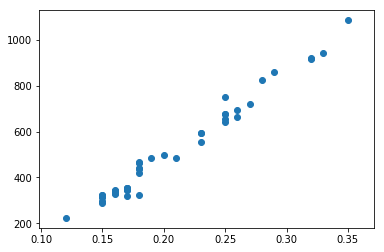

In [74]:
plt.scatter(df2['carat'],df2['price'])

### 3. Regression HousePrice vs. Crime


In [75]:
from sklearn.datasets import load_boston

In [104]:
boston_data = load_boston()
df = pd.DataFrame()
df['MedianHomePrice'] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df['CrimePerCapita'] = df2.iloc[:,0];
df['intercept'] = 1
df.head(),
df.describe()

,MedianHomePrice,CrimePerCapita,intercept
count,506.000000,506.000000,506.0
mean,22.532806,3.593761,1.0
std,9.197104,8.596783,0.0
min,5.000000,0.006320,1.0
25%,17.025000,0.082045,1.0
50%,21.200000,0.256510,1.0
75%,25.000000,3.647423,1.0
max,50.000000,88.976200,1.0


In [106]:
r_data = sm.OLS(df.MedianHomePrice, df[['intercept','CrimePerCapita']])
result = r_data.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        MedianHomePrice   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     88.15
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           2.08e-19
Time:                        19:39:00   Log-Likelihood:                -1799.5
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         24.0162      0.409     58.

In [107]:
a = [1,2,3,4,5]
b = [1,1,1,1,1]


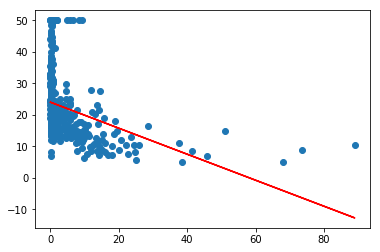

In [110]:
plt.scatter(df.CrimePerCapita, df.MedianHomePrice)
x = df.CrimePerCapita
plt.plot(x, x*(-0.4128) + 24, color = 'r')

In [113]:
np.sqrt(.149)

0.38600518131237566